# Prediction of Restaurants rating based on review text of Yelp reviews

**To be completed INDIVIDUALLY and due on April 18 at 3pm.**

In [1]:
print('Aaron Elliot')
print('U71617701')
print('ellioa2@bu.edu')

Aaron Elliot
U71617701
ellioa2@bu.edu


** (50 pts) **

In this assignment, we will be working with the [Yelp dataset](http://cs-people.bu.edu/bahargam/506/yelp_dataset_challenge_academic_dataset.tar). You can find the format of the dataset [here](https://www.yelp.com/dataset_challenge).

Our aim is to predict the rating of each restaurant from the reviews **text** of individuals reviews. 

You can use any model you learned in the class and then evaluate your model.

In [83]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
import sklearn.linear_model.perceptron as p
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.neighbors import KNeighborsClassifier #*
from sklearn.random_projection import sparse_random_matrix #*
from nltk.stem.snowball import SnowballStemmer #*
from nltk.tokenize import word_tokenize, sent_tokenize #*
from sklearn import preprocessing #*

#nltk.download()

In [4]:
BusinessDict = {}

with open('yelp_academic_dataset_business.json', encoding = "ISO-8859-1") as Json:
    for Business in Json:
        data = json.loads(Business)
        if 'Restaurants' in data["categories"] and data['review_count']>0:
            BusinessDict[data['business_id']]={'Lat':data['latitude'],'Long':data['longitude'],'Rating':data['stars']}
print("Finished")

Finished


In [5]:
Rating_list = []
TextList = []
with open('yelp_academic_dataset_review.json', encoding = "ISO-8859-1") as Json:
    for Review in Json:
        data = json.loads(Review)
        ID = data["business_id"]
        if (ID in BusinessDict):
            TextList.append(data["text"])
            Rating_list.append([BusinessDict[ID]['Rating']])
print("Finished")

Finished


In [1]:
# I ran out of RAM and the process ground to a halt part way through.
sno = SnowballStemmer("english", ignore_stopwords = True)
stem_text = []
i=0
while TextList:
    message = TextList.pop(0)
    for sent in sent_tokenize(message):
        for word in word_tokenize(sent):
            stem_text.append(" ".join(sno.stem(word)))
    if (i%1028==0):
        print(i)
    i=i+1

'''
---------------------------------------------------------------------------
MemoryError                               Traceback (most recent call last)
<ipython-input-21-b19f832e1ed5> in <module>()
      8     for sent in sent_tokenize(message):
      9         for word in word_tokenize(sent):
---> 10             stem_text.append(" ".join(sno.stem(word)))
     11     if (i%1028==0):
     12         print(i)

MemoryError: 

'''

NameError: name 'SnowballStemmer' is not defined

In [6]:
vectorizer = TfidfVectorizer(stop_words='english', min_df=8, max_df=0.8)
dtm = vectorizer.fit_transform(TextList)

del TextList
terms = vectorizer.get_feature_names()
print("Finished")

Finished


In [2]:
# I would use this method as well. However, the machine I am working on does not allow for such a method to run.
dtm_dense = dtm.todense()
centered_dtm = dtm_dense - np.mean(dtm_dense, axis=0)
"""
MemoryError                               Traceback (most recent call last)
<ipython-input-24-154643a84afd> in <module>()
----> 1 dtm_dense = dtm.todense()
      2 centered_dtm = dtm_dense - np.mean(dtm_dense, axis=0)
      3 np.sum(centered_dtm,axis=0)[:,:10]

C:\Users\Aaron\Anaconda3\lib\site-packages\scipy\sparse\base.py in todense(self, order, out)
    689             `numpy.matrix` object that shares the same memory.
    690         """
--> 691         return np.asmatrix(self.toarray(order=order, out=out))
    692 
    693     def toarray(self, order=None, out=None):

C:\Users\Aaron\Anaconda3\lib\site-packages\scipy\sparse\compressed.py in toarray(self, order, out)
    918     def toarray(self, order=None, out=None):
    919         """See the docstring for `spmatrix.toarray`."""
--> 920         return self.tocoo(copy=False).toarray(order=order, out=out)
    921 
    922     ##############################################################

C:\Users\Aaron\Anaconda3\lib\site-packages\scipy\sparse\coo.py in toarray(self, order, out)
    250     def toarray(self, order=None, out=None):
    251         """See the docstring for `spmatrix.toarray`."""
--> 252         B = self._process_toarray_args(order, out)
    253         fortran = int(B.flags.f_contiguous)
    254         if not fortran and not B.flags.c_contiguous:

C:\Users\Aaron\Anaconda3\lib\site-packages\scipy\sparse\base.py in _process_toarray_args(self, order, out)
   1007             return out
   1008         else:
-> 1009             return np.zeros(self.shape, dtype=self.dtype, order=order)
   1010 
   1011     def __numpy_ufunc__(self, func, method, pos, inputs, **kwargs):

MemoryError: """

SyntaxError: invalid syntax (<ipython-input-2-562599efe512>, line 14)

In [7]:
svd = TruncatedSVD(n_components=100, n_iter=4)
svdOutput = svd.fit_transform(dtm)
del(dtm)

[ 0.00301771  0.00535009  0.00464201  0.00355157  0.00341828  0.00337233
  0.00309166  0.00300543  0.00270783  0.00258469  0.00244038  0.00239479
  0.00228389  0.0021861   0.00215682]


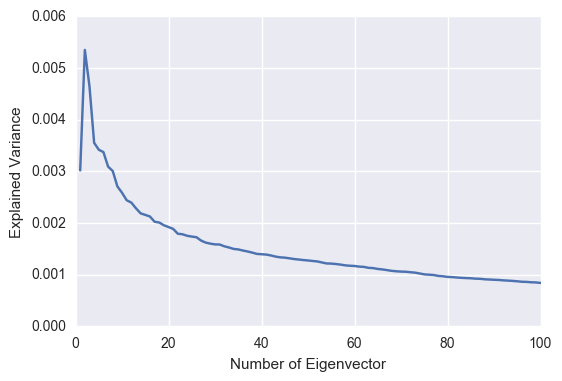

In [8]:
%matplotlib inline
plt.xlim([0,100])
plt.plot(range(1,len(svd.explained_variance_)+1),svd.explained_variance_)
plt.xlabel('Number of Eigenvector')
plt.ylabel('Explained Variance')
print(svd.explained_variance_[0:15])

In [81]:
def Absolutely_Correct(TrueValues,ExpectedValues):
    Count_True = 0
    Count_False = 0
    if len(TrueValues)==len(ExpectedValues):
        for i in range(len(TrueValues)):
            if str(TrueValues[i])==ExpectedValues[i]:
                Count_True+=1
            else:
                Count_False+=1
        return((Count_True,Count_False))
    else:
        print('Error len of values do not match in R2')
        return(Null)


In [10]:
svdOutput = np.concatenate((svdOutput,Rating_list), axis = 1)

In [36]:
train, test = train_test_split(svdOutput,test_size = 0.1)
Mean = np.mean(train[:,-1])
test_y = list(map(float, test[:,-1]))#.tolist()
train_y = list(map(str,train[:,-1]))#.tolist()
train = np.delete(train,-1,1)
test = np.delete(test,-1,1)

In [84]:
# Using perceptrons, as it was the first method that would work on this machine for this large of data
# Sadly this is not a model we used in this class. So I will also evaluate with Niave Bayes, a method we
# touched on in class.
# Additionally, I will use Passive aggressive Classifier, because the name sounds funny.

C = ['1.0','1.5','2.0','2.5','3.0','3.5','4.0','4.5','5.0']# or np.unique(train_y)

PP = p.Perceptron(n_iter=100, fit_intercept=True, eta0=0.002)
PP.partial_fit(train, train_y, classes = C)
Pred_PP = PP.predict(test)

NBP = BernoulliNB()
NBP.partial_fit(train, train_y, classes = C)
Pred_NBP = NBP.predict(test)

PAC = PassiveAggressiveClassifier()
PAC.partial_fit(train,train_y,classes = C)
Pred_PAC = PAC.predict(test)

In [88]:
PPVal = Absolutely_Correct(test_y,Pred_PP)
PPAC = PPVal2[0]/(PPVal2[0]+PPVal2[1])

NBVal = Absolutely_Correct(test_y,Pred_NBP)
NBAC = NBVal2[0]/(NBVal2[0]+NBVal2[1])

PACVal = Absolutely_Correct(test_y,Pred_PAC)
PAAC = PACVal[0]/(PACVal[1]+PACVal[0])
print('The Percent correct for Niave Bayse was %f' % NBAC)
print('The Percent correct for Perceptron was %f' % PPAC)
print('The Percent correct for Passive Aggressive Classifier was %f' % PAAC)


The Percent correct for Niave Bayse was 0.413981
The Percent correct for Perceptron was 0.381661
The Percent correct for Passive Aggressive Classifier was 0.292720


In [ ]:
# I was also working on a majority vote calculator, but it wasnt so simple for 9 distinct classifications
# so I left this unfinished
'''def Majority_Vote(TrueValues, ExpectedValues1,ExpectedValues2,ExpectedValues3):
    Count_True = 0
    Count_False = 0
    if len(TrueValues)==len(ExpectedValues):
        for i in range(len(TrueValues)):
            if ExpectedValues2[i] == ExpectedValues3[i]:
                if  == TrueValues[i]
                    Count_True+=1
            else:
                if TrueValues[i] == ExpectedValues1[i]:
                    Count_True+=1
                    else:

            if str(TrueValues[i])==ExpectedValues[i]:
                Count_True+=1
            else:
                Count_False+=1
        return((Count_True,Count_False))
    else:
        print('Error len of values do not match in R2')
        return(Null)

    '''


In [ ]:
# Overall, the success of Niave Bayse makes it a clear winner, with 41% success rate on our dataset.
# Perceptron also performed well, and with some tooling, it likely could have beaten Niave Bayse.
# I wanted to setup a method which bagged Niave Bayse Perceptron and another method in a majority vote scenary.
# However, I ran out of time for that.